<a href="https://colab.research.google.com/github/jagadeesh-nakka/machine-Learnig/blob/main/Copy_of_Locally_weighted_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np

In [ ]:
df=yf.download('^GSPC',start='2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2023-10-05,4259.310059,4267.129883,4225.910156,4258.189941,4258.189941,3581470000
2023-10-06,4234.790039,4324.100098,4219.549805,4308.500000,4308.500000,3902030000
2023-10-09,4289.020020,4341.729980,4283.790039,4335.660156,4335.660156,3174630000


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['Low'].unique()

array([1116.56005859, 1129.66003418, 1133.94995117, ..., 4283.79003906,
       4339.64013672, 4366.58984375])

<Axes: xlabel='Date'>

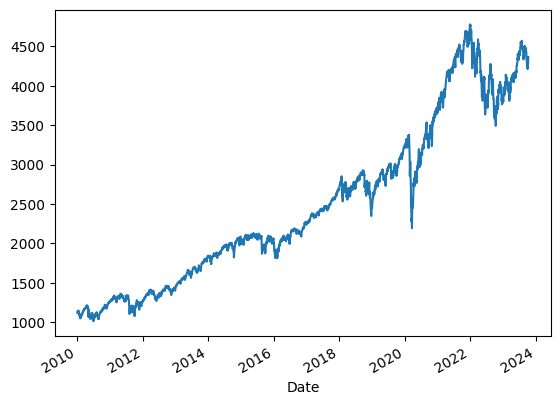

In [ ]:
df['Low'].plot()

In [ ]:
df['returns']=np.log(df.Close.pct_change()+1)

In [ ]:
def lagit(df,lags):
  names=[]
  for i in range(1,lags+1):
    df['Lag_'+str(i)]=df['returns'].shift(i)
    names.append('Lag_'+str(i))
  return names

In [ ]:
lagnames=lagit(df,5)

In [ ]:
df


,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003111,NaN,NaN,NaN,NaN,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000545,0.003111,NaN,NaN,NaN,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.003993,0.000545,0.003111,NaN,NaN,NaN
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002878,0.003993,0.000545,0.003111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,4259.310059,4267.129883,4225.910156,4258.189941,4258.189941,3581470000,-0.001305,0.008077,-0.013839,0.000079,-0.002713,0.005876
2023-10-06,4234.790039,4324.100098,4219.549805,4308.500000,4308.500000,3902030000,0.011746,-0.001305,0.008077,-0.013839,0.000079,-0.002713
2023-10-09,4289.020020,4341.729980,4283.790039,4335.660156,4335.660156,3174630000,0.006284,0.011746,-0.001305,0.008077,-0.013839,0.000079


In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(df[lagnames],df['returns'])

LinearRegression()

In [ ]:
df['predict_LR']=model.predict(df[lagnames])

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,predict_LR
Date,,,,,,,,,,,,,
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009425,0.001745,0.002878,0.003993,0.000545,0.003111,2.855317e-04
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008291,-0.009425,0.001745,0.002878,0.003993,0.000545,1.354611e-03
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002423,0.008291,-0.009425,0.001745,0.002878,0.003993,-1.292131e-03
2010-01-15,1147.719971,1147.770020,1131.390015,1136.030029,1136.030029,4758730000,-0.010882,0.002423,0.008291,-0.009425,0.001745,0.002878,8.063827e-04
2010-01-19,1136.030029,1150.449951,1135.770020,1150.229980,1150.229980,4724830000,0.012422,-0.010882,0.002423,0.008291,-0.009425,0.001745,2.107449e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,4259.310059,4267.129883,4225.910156,4258.189941,4258.189941,3581470000,-0.001305,0.008077,-0.013839,0.000079,-0.002713,0.005876,-1.221858e-03
2023-10-06,4234.790039,4324.100098,4219.549805,4308.500000,4308.500000,3902030000,0.011746,-0.001305,0.008077,-0.013839,0.000079,-0.002713,1.420040e-03
2023-10-09,4289.020020,4341.729980,4283.790039,4335.660156,4335.660156,3174630000,0.006284,0.011746,-0.001305,0.008077,-0.013839,0.000079,-4.901576e-04
